# Лабораторная работа №2. Решение СЛАУ методом градиентного спуска

### Аннотация
В ходе данной лабораторной работы решается СЛАУ Ax = b (о)) методом градиентного спуска. Это итерационный метод, предсавляющий собой "движение" против направления наибольшего возрастания функции. Соответственно, $x_{k+1}$ пределяется как:
$$
    x_{k+1} = x_{k} - \alpha \cdot grad(F(x))
$$

$$
    F(x) = \frac{1}{2}\|A\mathbf{x} - \mathbf{b}\|^2
$$

$$
    grad(F(x)) = A^{T} \cdot (Ax - b)
$$

r - невязка, которая определяется как:
$$
    r_k = Ax_k - b
$$
Решаемая СЛАУ:
$$
\begin{cases} 
ax_1 + x_2 + \frac{x_3}{b} = 1 \\ 
x_1 + ax_2 + x_3 + \frac{x_4}{b} = 2 \\ 
x_2 + ax_3 + x_4 + \frac{x_5}{b} = 3 \\ 
\cdots \\ 
x_{m-1} + ax_m + x_{m+1} + \frac{x_{m+2}}{b} = m \\ 
\cdots \\ 
x_{n-2} + ax_{n-1} + x_n = n-1 \\ 
x_{n-1} + ax_n = n 
\end{cases}
$$

В конце представлен график зависмости логарифма невязки от числа итераций.



Сходимость достигнута на итерации221
Норма невязки: 8.891786e-07
x[1] = 0.081141
x[2] = 0.163937
x[3] = 0.246566
x[4] = 0.329213
x[5] = 0.411857
x[6] = 0.494502
x[7] = 0.577146
x[8] = 0.659791
x[9] = 0.742436
x[10] = 0.825080
x[11] = 0.907725
x[12] = 0.990370
x[13] = 1.073014
x[14] = 1.155659
x[15] = 1.238303
x[16] = 1.320948
x[17] = 1.403593
x[18] = 1.486237
x[19] = 1.568882
x[20] = 1.651527
x[21] = 1.734171
x[22] = 1.816816
x[23] = 1.899460
x[24] = 1.982105
x[25] = 2.064750
x[26] = 2.147394
x[27] = 2.230039
x[28] = 2.312684
x[29] = 2.395328
x[30] = 2.477973
x[31] = 2.560617
x[32] = 2.643262
x[33] = 2.725907
x[34] = 2.808551
x[35] = 2.891196
x[36] = 2.973841
x[37] = 3.056485
x[38] = 3.139130
x[39] = 3.221774
x[40] = 3.304419
x[41] = 3.387064
x[42] = 3.469708
x[43] = 3.552353
x[44] = 3.634998
x[45] = 3.717642
x[46] = 3.800287
x[47] = 3.882931
x[48] = 3.965576
x[49] = 4.048221
x[50] = 4.130865
x[51] = 4.213510
x[52] = 4.296155
x[53] = 4.378799
x[54] = 4.461444
x[55] = 4.544089
x[56] =

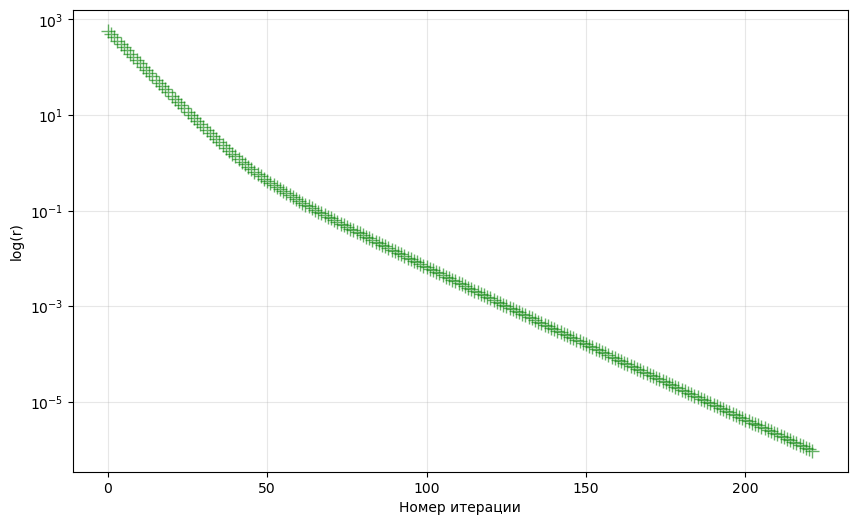

In [12]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
a = 10
b = 10

A = [[0.0] * n for _ in range(n)]

#Матрица системы
for i in range(n):
    #Обрабатываем первые две и последние две строчки отдельно
    if (i == 0):
        A[i][0] = a
        A[i][1] = 1
        if n > 2:
            A[i][2] = 1/b
    elif (i == 1):
        A[i][0] = 1
        A[i][1] = a
        A[i][2] = 1
        if (n > 3):
            A[i][3] = 1/b
    elif (i == n-1):
        A[i][n-2] = 1
        A[i][n-1] = a
    elif (i == n-2):
        A[i][n-3] = 1
        A[i][n-2] = a
        A[i][n-1] = 1
    else:
        A[i][i-1] = 1
        A[i][i] = a
        A[i][i+1] = 1
        if i + 2 < n:
            A[i][i+2] = 1/b

#Столбец b
b_vec = [i + 1 for i in range(n)]

A = np.array(A)
b_vec = np.array(b_vec)

x = np.zeros(n)
alpha = 0.001
max_iter = 10000
e = 1e-6
residual_history = []

for k in range(max_iter):
    r = np.zeros(n)
    for i in range(n):
        for j in range(n):
            r[i] += A[i][j] * x[j]
        r[i] -= b_vec[i]

    grad = np.zeros(n)
    for j in range(n):
        for i in range(n):
            grad[j] += A[i][j] * r[i]

    for i in range(n):
        x[i] = x[i] - alpha * grad[i]

    residual_norm = 0.0
    for i in range(n):
        residual_norm += r[i] ** 2
    residual_norm = np.sqrt(residual_norm)
    residual_history.append(residual_norm)

    if residual_norm < e:
        print("\n")
        print("Сходимость достигнута на итерации" + str(k))
        break

final_residual = np.zeros(n)
for i in range(n):
    for j in range(n):
        final_residual[i] += A[i][j] * x[j]
    final_residual[i] -= b_vec[i]

final_norm = np.sqrt(sum(r**2 for r in final_residual))
print(f"Норма невязки: {final_norm:.6e}")

for i in range(n):
    print(f"x[{i+1}] = {x[i]:.6f}")

plt.figure(figsize=(10, 6))
#plt.semilogy(range(len(residual_history)), residual_history, 'g-', linewidth=1)
plt.semilogy(range(len(residual_history)), residual_history, 'g+', markersize=10, alpha=0.6)
plt.xlabel('Номер итерации')
plt.ylabel('log(r)')
plt.grid(True, alpha=0.3)
plt.show()

## Вывод
В ходе данной лабораторной работы получено решение СЛАУ методом градиентного спуска, оценена невязка (норма невязки $\approx 8.8 \cdot 10^{-7}$). На приведённом графике отображена завсимость логарифма невязки от номера итерации. Наблюдается её уменьшение с ростом количества итераций.